In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly
import plotly.express as px

import plotly.graph_objs as go
from plotly.graph_objs import bar
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#import cufflinks as cf
#### For jupyter only (once only)
pyo.init_notebook_mode(connected=True)
import cufflinks as cf
#cf.go_offline()
#cf.set_config_file(offline=True, world_readable=True)
from plotly.subplots import make_subplots
pyo.init_notebook_mode(connected=True)
import folium
%matplotlib inline


In [2]:
df=pd.read_csv(r'C:\Users\hp\Desktop\ML\project\csvfiles\state_level_latest.csv')

In [3]:
#df.info()

In [4]:
df.drop('State_Notes',axis=1,inplace=True)

In [5]:
#df.head()

In [6]:
df.drop(['Delta_Confirmed','Delta_Recovered','Delta_Deaths'],axis=1,inplace=True)
#df.head()

In [7]:
#total confirmed cases(migrant+confirmed)
df['Total_confirmed_cases']=df['Confirmed']+df['Migrated_Other']
#drop 
df_total=df.head(1)
#remove 0th row(total)
df=df[1:]
#df.head()

<strong>TOTAL DATA OF ALL COVID19 CASES OF ALL STATES</strong>

In [8]:
#Dark where value is maximum
df.style.background_gradient(cmap='Reds')


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Total_confirmed_cases
1,Maharashtra,275640,152613,10928,111801,15/07/2020 19:43:06,298,MH,275938
2,Tamil Nadu,151820,102310,2167,47343,15/07/2020 19:18:00,0,TN,151820
3,Delhi,116993,95699,3487,17807,15/07/2020 20:54:01,0,DL,116993
4,Gujarat,44648,31346,2080,11222,15/07/2020 20:17:01,0,GJ,44648
5,Karnataka,47253,18467,933,27849,15/07/2020 21:48:02,4,KA,47257
6,Uttar Pradesh,41383,25743,1012,14628,15/07/2020 21:48:06,0,UP,41383
7,Telangana,39342,25999,386,12957,15/07/2020 22:38:01,0,TG,39342
8,Andhra Pradesh,35451,18378,452,16621,15/07/2020 16:39:59,0,AP,35451
9,West Bengal,34427,20680,1000,12747,15/07/2020 19:43:16,0,WB,34427
10,Rajasthan,26437,19502,530,6405,15/07/2020 22:15:16,0,RJ,26437


<strong>TOTAL CASES</strong>

In [9]:
df_total

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Total_confirmed_cases
0,Total,970169,613735,24929,331116,16/07/2020 00:16:58,389,TT,970558


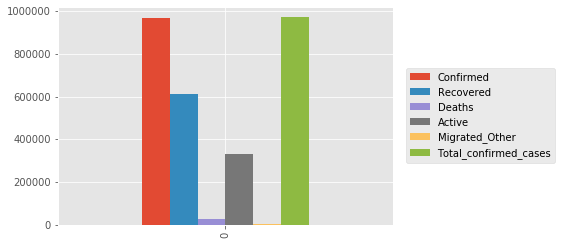

In [10]:
#graph about toatal cases
#barplot
df_total.plot.bar()
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

<strong>confirm cases</strong>

Text(0.5, 1.0, 'TOTAL CONFIRMED CASES(National + Migrant) OF ALL STATES')

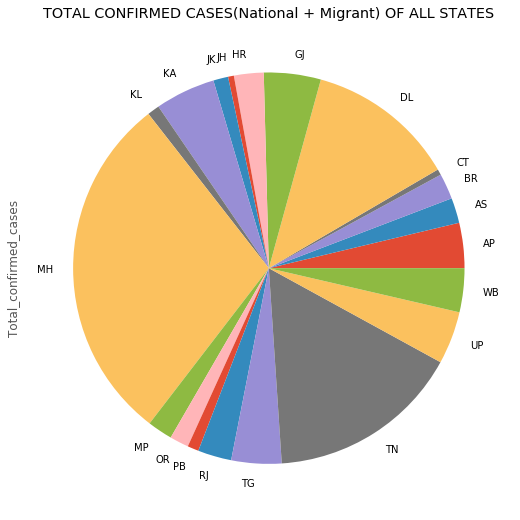

In [11]:
#top 20 States where Total confirm cases using 
df.head(20).groupby('State_code')['Total_confirmed_cases'].sum().plot.pie(figsize=(9,9))
plt.title('TOTAL CONFIRMED CASES(National + Migrant) OF ALL STATES')

<strong>CONFIRM CASES</strong>

In [12]:
#total confirm cases
Total_confirm_cases=df.groupby('State')['Total_confirmed_cases'].sum().to_frame()
#Total_confirm_cases
#Total_confirm_cases.style.background_gradient(cmap='Reds')

In [13]:
#Total_confirm_cases1=df.groupby('State_code')['Total_confirmed_cases'].sum().sort_values(ascending=False).to_frame()
#Total_confirm_cases1['Total_confirmed_cases'].plot(figsize=(20,5),linewidth=4,color='b')
#plt.title('GRAPH OF TOTAL CONFIRM CASES(national+migrant) CASES FOR ALL STATE')

#scatter plotly
df.iplot(kind='scatter',x='State',y=['Total_confirmed_cases'],color='red',width=3,mode='markers+lines',size=7,title='GRAPH OF TOTAL CONFIRM CASES(national+migrant) CASES FOR ALL STATE',xTitle='States',yTitle='no. of people')


In [14]:
#Total_confirm_cases.plot.bar(figsize=(18,4))
#plt.title('GRAPH OF TOTAL CONFIRM CASES(national+migrant) CASES FOR ALL STATE')
df.iplot(kind='bar',x='State',y='Total_confirmed_cases',color='red',title='GRAPH OF TOTAL CONFIRM CASES(national+migrant) CASES FOR ALL STATE',xTitle='States',yTitle='no. of people') #it is not showing

# range km kr skte h kya:D

<strong>TOTAL ACTIVE CASES</strong>

In [15]:
Total_active_cases=df.groupby('State')['Active'].sum().to_frame()
#Total_active_cases
#Total_active_cases.style.background_gradient(cmap='Reds')

In [16]:
#scatter plotly
df.iplot(kind='scatter',x='State',y='Active',color='blue',width=3,mode='markers+lines',size=7,title='GRAPH OF TOTAL ACTIVE CASES FOR ALL STATE',xTitle='States',yTitle='no. of people')


#Total_active_cases1=df.groupby('State_code')['Active'].sum().sort_values(ascending=False).to_frame()
#Total_active_cases1['Active'].plot(figsize=(20,5),linewidth=4,color='r')
#plt.title('GRAPH OF ACTIVE CASES FOR ALL STATE')
#kuch esa ki isme all states aajaye

In [17]:
#Total_active_cases.plot.bar(figsize=(18,4))
#plt.title("TOTAL ACTIVE CASES OF STATES")
# range km kr skte h kya:D

#PLOTLY
df.iplot(kind='bar',x='State',y='Active',color='blue',title='TOTAL ACTIVE CASES OF ALL STATES')

<strong>TOTAL DEATHS</strong>

In [18]:
Total_death=df.groupby('State')['Deaths'].sum().to_frame()
#Total_death
#Total_death.style.background_gradient(cmap='Reds')

In [19]:
#total death
#Total_death1=df.groupby('State_code')['Deaths'].sum().sort_values(ascending=False).to_frame()
#Total_death1['Deaths'].plot(figsize=(20,5),linewidth=4,color='y')
#plt.title('GRAPH OF TOTAL DEATH CASES FOR ALL STATE')#

#scatter plotly
df.iplot(kind='scatter',x='State',y=['Deaths'],color='black',width=3,mode='markers+lines',size=7,title='TOTAL DEATHS FOR ALL STATE',xTitle='States',yTitle='no. of people')


In [20]:
#Total_death.plot.bar(figsize=(18,4))
#plt.title("TOTAL DEATHS CASES OF STATES")
# range km kr skte h kya:D

#PLOTLY
df.iplot(kind='bar',x='State',y='Deaths',color='black',title='TOTAL DEATHS OF ALL STATES')

<strong>TOTAL RECOVERED</strong>

In [21]:
Total_recover=df.groupby('State')['Recovered'].sum().to_frame()
#Total_recover
#Total_recover.style.background_gradient(cmap='Reds')

In [22]:
#total recover
#Total_recover1=df.groupby('State_code')['Recovered'].sum().sort_values(ascending=False).to_frame()
#Total_recover1['Recovered'].plot(figsize=(20,5),linewidth=4,color='r')
#plt.title('GRAPH OF TOTAL RECOVERE CASES FOR ALL STATE')

#scatter plotly
df.iplot(kind='scatter',x='State',y=['Recovered'],color='green',width=3,mode='markers+lines',size=7,title='TOTAL RECOVERED OF ALL STATE',xTitle='States',yTitle='no. of people')


In [23]:
#Total_recover.plot.bar(figsize=(18,4))
#plt.title("TOTAL RECOVERED PEOPLE OF STATES")

#PLOTLY
df.iplot(kind='bar',x='State',y='Recovered',color='green',title='TOTAL RECOVERED OF ALL STATES')


<strong>ACTIVE/RECOVERED/TOTAL_CONFIRMED_CASES/DEATHS</strong>

In [24]:
#using plotly
df.iplot(kind='bar',x='State',y=['Total_confirmed_cases','Active','Recovered','Deaths'],color=['red','blue','green','black']) #it is not showing

#data=[go.Bar(x=df['State'],y=df['Deaths'])]
#fig=go.Figure(data=data)
#iplot(fig)

#px.bar(df,x='State',y='Deaths')

In [25]:
#scatter plotly
df.iplot(kind='scatter',x='State',y=['Total_confirmed_cases','Active','Recovered','Deaths'],width=2,color=['red','blue','green','black'],mode='markers+lines',size=6,title='TYPE OF CASES IN ALL STATES',xTitle='States',yTitle='no. of people')
#plotly express graph
#px.scatter(df,x='State',y='Total_confirmed_cases')

<strong>POPULATION AND COVID19</strong>

In [26]:
df_ip=pd.read_csv(r'C:\Users\hp\Desktop\ML\project\population_cencus_2011.csv')

In [27]:
#df_ip.drop('Sno',axis=1,inplace=True)
df_ip=df_ip.rename(columns={'State / Union Territory':'State'})
#df_ip.style.background_gradient(cmap='Reds')
#df_ip.head()

In [28]:
#Merging df and df_ip
df_tt=pd.merge(df,df_ip,on='State')
df_tt.drop(['State_code','Area',"Gender Ratio"],inplace=True,axis=1)


In [29]:
df_ip=pd.read_csv(r'C:\Users\hp\Desktop\ML\project\population_cencus_2011.csv')

In [30]:
def f(x):
    if(x['Total_confirmed_cases']!=0):
        b=(x['Recovered']/x['Total_confirmed_cases'])*100
        return b
    return 100
    
df_tt['Recovery Rate(%)']=df_tt[['Total_confirmed_cases','Recovered']].apply(f,axis=1)

In [31]:
def f(x):
    if(x['Total_confirmed_cases']!=0):
        b=(x['Deaths']/x['Total_confirmed_cases'])*100
        return b
    return 0
    
df_tt['Death(%)']=df_tt[['Deaths','Total_confirmed_cases']].apply(f,axis=1)

In [32]:
def f(x):
        b=(x['Total_confirmed_cases']/x['Population'])*100
        return b
    
df_tt['Covidcases(%)']=df_tt[['Total_confirmed_cases','Population']].apply(f,axis=1)

<strong>% POPULATION OF STATES INFECTED BY COVID-19</strong>

In [33]:
df_tt.drop('Sno',axis=1,inplace=True)
df_tt.head()
#df_tt.style.background_gradient(cmap='Reds')

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,Total_confirmed_cases,Population,Rural population,Urban population,Density,Recovery Rate(%),Death(%),Covidcases(%)
0,Maharashtra,275640,152613,10928,111801,15/07/2020 19:43:06,298,275938,112374333,61556074,50818259,365/km2 (950/sq mi),55.306989,3.960310,0.245553
1,Tamil Nadu,151820,102310,2167,47343,15/07/2020 19:18:00,0,151820,72147030,37229590,34917440,"555/km2 (1,440/sq mi)",67.389013,1.427348,0.210431
2,Delhi,116993,95699,3487,17807,15/07/2020 20:54:01,0,116993,16787941,419042,16368899,"11,297/km2 (29,260/sq mi)",81.798911,2.980520,0.696887
3,Gujarat,44648,31346,2080,11222,15/07/2020 20:17:01,0,44648,60439692,34694609,25745083,308/km2 (800/sq mi),70.206952,4.658663,0.073872
4,Karnataka,47253,18467,933,27849,15/07/2020 21:48:02,4,47257,61095297,37469335,23625962,319/km2 (830/sq mi),39.077809,1.974311,0.077350


In [34]:
##covidcases
df_tt.iplot(kind='scatter',y='State',x='Covidcases(%)',color='red',width=4,mode='markers+lines',size=9,title='TOTAL COVID19 CASES Per(%) OF ALL STATE out of whole population',xTitle='States',yTitle='Covidcases(%)')


In [35]:
##covidcases
df_tt.iplot(kind='bar',x='State',y='Covidcases(%)',color='red',width=4,mode='markers+lines',size=9,title='TOTAL COVID19 CASES Per(%) OF ALL STATE out of whole population',xTitle='States',yTitle='Covidcases(%)')


<strong>RECOVERY_RATE</strong>

In [36]:
##
df_tt.iplot(kind='scatter',x='State',y='Recovery Rate(%)',color='green',width=3,mode='markers+lines',size=7,title='TOTAL RECOVERED Rate(%) OF ALL STATE',xTitle='States',yTitle='Recovery_Rate(%)')


In [37]:
df_tt.iplot(kind='bar',x='State',y='Recovery Rate(%)',color='green',title='TOTAL RECOVERY RATE(%) OF ALL STATES',xTitle='States',yTitle='Recovery_Rate(%)')

<strong>DEATH(%)</strong>

In [38]:
df_tt.iplot(kind='scatter',x='State',y='Death(%)',color='grey',title='TOTAL DEATHS(%) OF ALL STATES',width=3,mode='markers+lines',size=7,xTitle='States',yTitle='Death(%)')

In [39]:
df_tt.iplot(kind='bar',x='State',y='Death(%)',color='grey',title='TOTAL DEATHS(%) OF ALL STATES',xTitle='States',yTitle='Death(%)')

<strong><br>INPUT A STATE NAME AND FIND TOTAL CONFIRMED CASES, RECOVRED CASES, DEATH OF THOSE STATE</br></strong>

In [75]:
print('ENTER A STATE NAME')
st=input()
st=st.capitalize()
df_st=df[df['State']==st]
labels = ['Total Confirmed Cases','Recovered cases','Deaths']
values = [df_st['Total_confirmed_cases'].max(),df_st['Recovered'].max(),df_st['Deaths'].max()]
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()
df[df['State']==st]

ENTER A STATE NAME
Rajasthan


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Total_confirmed_cases
10,Rajasthan,26437,19502,530,6405,15/07/2020 22:15:16,0,RJ,26437


In [41]:
df_co=pd.read_excel(r'C:\Users\hp\Desktop\ML\project\Indian Coordinates.xlsx')

In [71]:
#df_co.head()

In [72]:
df_co=df_co.rename(columns={'Name of State / UT':'State'})
df_total=pd.merge(df,df_co,on='State')
df_total

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Total_confirmed_cases,Latitude,Longitude
0,Maharashtra,275640,152613,10928,111801,15/07/2020 19:43:06,298,MH,275938,19.250232,73.160175
1,Tamil Nadu,151820,102310,2167,47343,15/07/2020 19:18:00,0,TN,151820,12.920386,79.150042
2,Delhi,116993,95699,3487,17807,15/07/2020 20:54:01,0,DL,116993,28.669993,77.230004
3,Karnataka,47253,18467,933,27849,15/07/2020 21:48:02,4,KA,47257,12.570381,76.919997
4,Uttar Pradesh,41383,25743,1012,14628,15/07/2020 21:48:06,0,UP,41383,27.599981,78.050006
5,Andhra Pradesh,35451,18378,452,16621,15/07/2020 16:39:59,0,AP,35451,14.750429,78.570026
6,Rajasthan,26437,19502,530,6405,15/07/2020 22:15:16,0,RJ,26437,26.449999,74.639981
7,Haryana,23306,17667,319,5320,15/07/2020 21:48:09,0,HR,23306,28.450006,77.019991
8,Punjab,8799,5867,221,2711,15/07/2020 20:54:22,0,PB,8799,31.519974,75.980003
9,Kerala,9554,4634,36,4880,15/07/2020 19:43:23,4,KL,9558,8.900373,76.569993


In [73]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='stamenterrain')
for lat,long,tc,st_name in zip(df_total['Latitude'],df_total['Longitude'],df_total['Total_confirmed_cases'],df_total['State']):
    folium.CircleMarker([lat,long],radius=5,popup=('<strong>State</strong>: '+str(st_name).capitalize()+'<br>''<strong>Total_Confirmed_Cases</strong>: '+str(tc)+ '<br'),color='black',full_color='red',fill_opacity=0.3).add_to(map)

In [74]:
map

<strong>NATIONAL NEWS DAILY CASES</strong>

In [49]:
df_daily=pd.read_csv(r'C:\Users\hp\Desktop\ML\project\nation_level_daily.csv')

In [50]:
df_daily=df_daily[2:]


In [51]:
df_daily

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
5,04 February,0,3,0,0,0,0
6,05 February,0,3,0,0,0,0
...,...,...,...,...,...,...,...
163,11 July,27757,850366,19981,536232,543,22689
164,12 July,29106,879472,18198,554430,500,23189
165,13 July,28178,907650,17683,572113,541,23730
166,14 July,29917,937567,20977,593090,587,24317


<strong>DAILY CONFIRMED CASES AND TOTAL CONFIRMED CASES IN EVERY MONTH</strong>

In [57]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_daily[0:29]['Date'], y=df_daily[0:29]['Daily Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_daily[0:29]['Date'], y=df_daily[0:29]['Total Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="DAILY CONFIRMED CASES IN FEBRUARY       TOTAL CONFIRMED CASES IN FEBRUARY")

In [58]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_daily[29:60]['Date'], y=df_daily[29:60]['Daily Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_daily[29:60]['Date'], y=df_daily[29:60]['Total Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="DAILY CONFIRMED CASES IN MARCH      TOTAL CONFIRMED CASES IN MARCH")

In [59]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_daily[60:90]['Date'], y=df_daily[60:90]['Daily Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_daily[60:90]['Date'], y=df_daily[60:90]['Total Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="DAILY CONFIRMED CASES IN APRIL      TOTAL CONFIRMED CASES IN APRIL")

In [60]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_daily[90:120]['Date'], y=df_daily[90:120]['Daily Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_daily[90:120]['Date'], y=df_daily[90:120]['Total Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="DAILY CONFIRMED CASES IN MAY      TOTAL CONFIRMED CASES IN MAY")

In [61]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_daily[121:151]['Date'], y=df_daily[121:151]['Daily Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_daily[121:151]['Date'], y=df_daily[121:151]['Total Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="DAILY CONFIRMED CASES IN JUNE      TOTAL CONFIRMED CASES IN JUNE")

In [62]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_daily[152:]['Date'], y=df_daily[152:]['Daily Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_daily[152:]['Date'], y=df_daily[152:]['Total Confirmed'],mode='lines+markers',opacity=0.5),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="DAILY CONFIRMED CASES IN JULY      TOTAL CONFIRMED CASES IN JULY")

In [63]:
##How can we use statics here

In [65]:
df_com=pd.read_csv(r'C:\Users\hp\Desktop\ML\project\csvfiles\complete.csv')

<strong>COvidCasesDaily in All States</strong>

In [66]:
df_com=df_com[2:]

In [68]:
df_com.rename({'Name of State / UT':'State','Cured/Discharged/Migrated':'Recovered'},axis=1,inplace=True)
df_com

,Date,State,Latitude,Longitude,Total Confirmed cases,Death,Recovered,New cases,New deaths,New recovered
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
5,2020-02-04,Kerala,10.8505,76.2711,3,0,0,0,0,0
6,2020-02-05,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3960,2020-07-16,Telangana,18.1124,79.0193,39342,386,25999,1597,11,1159
3961,2020-07-16,Tripura,23.9408,91.9882,2268,3,1604,98,1,66
3962,2020-07-16,Uttar Pradesh,26.8467,80.9462,41383,1012,25743,1659,29,760
3963,2020-07-16,Uttarakhand,30.0668,79.0193,3785,50,2948,99,0,81


<strong> INPUT DATE AND FIND BARPLOT, SCATTER PLOT, AND DATAFRAME OF COVID-19 CASES FOR ALL STATES</strong>

In [69]:
#2 task (1) any person put date them graph will be arise for state
#2 task(2) devide the graph(month vs state)
#3 made piplit according to states
#1- in one statewise Dead cases,recovered
print("INPUT DATE, MONTH, YEAR")
k,j,i=input().split()
df_res=df_com[df_com['Date']=='{}-{}-{}'.format(i,j,k)].groupby('State')[['Total Confirmed cases','Recovered']].sum()
#df_res.iplot(kind='scatter',x='State',y=['Total confirmed cases','Death','Recovered'],color='grey',title='2020-{}-{}'.format(i,j)+'NO. OF PEOPLE IN ALL STATES',width=3,mode='markers+lines',size=5,xTitle='States',yTitle='PEOPLE')
df_res.iplot(kind='bar',subplots=True,title='Barplot of {}-{}-{}'.format(i,j,k))

df_res.iplot(kind='scatter',sortbars=True,bargroupgap=1, boxpoints=True,width=2,mode='markers+lines',size=5,title='Scatter plot of {}-{}-{}'.format(i,j,k))
States =list(df_res.index)
cases = df_res['Total Confirmed cases']
trace = go.Pie(labels = States, values = cases)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)
#df_re
#df_res.style.background_gradient(cmap='Reds')


INPUT DATE, MONTH, YEAR
25 04 2020


<strong>Input a MONTH number and find CASES OF ALL STATES</strong>

In [70]:
print("INPUT A MONTH NUMBER")
month={'01':'JANUARY','02':'FEBRUARY','03':'MARCH','04':'APRIL','05':'MAY','06':'JUNE','07':'JULY','08':'AUGUST','09':'SEPTEMBER'}
m1=input()
print('\n')
df_mon=df_com[df_com['Date'].apply(lambda x:x[-5:-3]==m1)].groupby('State')[['Total Confirmed cases','Recovered']].max()
df_mon.iplot(kind='bar',subplots=True,title='TOTAL CASES OF ALL STATES IN {} MONTH'.format(month[m1]))

df_mon.iplot(kind='scatter',sortbars=True,bargroupgap=1, boxpoints=True,width=2,mode='markers+lines',size=5,title='TOTAL CASES OF ALL STATES IN {} MONTH'.format(month[m1]))
print('\n\nTOTAL CASES OF ALL STATES IN {} MONTH'.format(month[m1]))
States = list(df_mon.index)
cases = df_mon['Total Confirmed cases']
trace = go.Pie(labels = States, values = cases)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)



INPUT A MONTH NUMBER
04






TOTAL CASES OF ALL STATES IN APRIL MONTH
